# Process MAOS Output

Process this MAOS simulation.

## Imports

In [17]:
from paarti import psfs, psf_plots
from paarti.psf_metrics import metrics
from astropy.io import fits
import os, fnmatch

%matplotlib inline

## Setup Data Set to Analyze

Depending on how the simulation is run, select out the bandpass index to be analyzed. 
First lets figure out what wavelength options we have. 

In [9]:
filelist = os.listdir('./')
fits_files = fnmatch.filter(filelist,'evlpsfcl_1_x*_y*.fits')

psf_all_wvls = fits.open(fits_files[0])

all_waves = [psf_all_wvls[pp].header['wvl'] * 1e9 for pp in range(len(psf_all_wvls))]
print(all_waves, 'microns')

[800.0, 1000.0, 1250.0, 1650.0, 2200.0] microns


## Analyze K-band PSFs

In [10]:
# Select the bandpass index we want (0-based)
bandpass = 4

In [ ]:
psf_stack = psfs.MAOS_PSF_stack(directory='./', isgrid=True, bandpass=bandpass)

Calculate metrics for each PSF. Save the results to the psf_stack object.

In [14]:
psf_stack.calc_metrics(parallel=False)

Plot the PSFs with metrics.

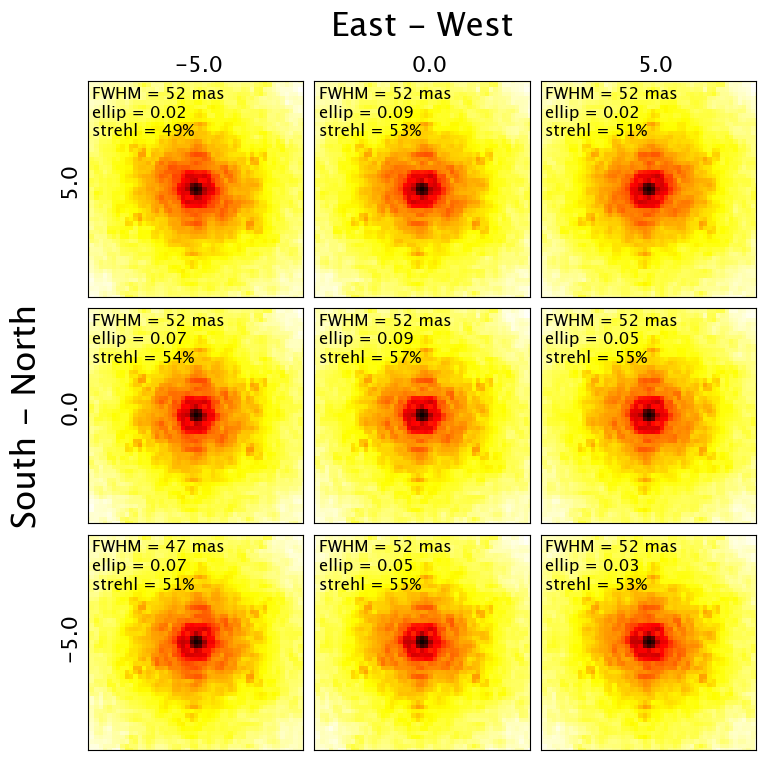

In [18]:
zoom = 0.5 # arcsec for side of PSF box

psf_plots.plot_psf_stack(psf_stack, zoom=zoom)